# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdax
%matplotlib inline  

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [3]:
from datetime import datetime
from datetime import timedelta
import calendar

In [4]:
plotly.tools.set_credentials_file(username='gasia4444', api_key='rC8FB3pveGzyME366dL7')

# GDAX to get BTC historical data

In [5]:
mod = gdax.PublicClient()
data = mod.get_product_historic_rates('BTC-USD')
df = pd.DataFrame(data, columns = ['time', 'low', 'high', 'open', 'close', 'volume'])
df = df.sort_values('time', ascending=True).reset_index(drop = True)

In [6]:
df.head()

,time,low,high,open,close,volume
0,1527001980,8229.53,8229.54,8229.54,8229.54,1.950928
1,1527002040,8229.53,8229.54,8229.54,8229.54,1.099946
2,1527002100,8229.53,8230.64,8229.54,8230.63,9.792302
3,1527002160,8230.63,8231.00,8230.63,8230.99,1.263783
4,1527002220,8230.99,8232.93,8230.99,8232.93,1.307830


# Analyze

In [7]:
import datetime
utc_time = datetime.datetime.utcfromtimestamp(np.min(df.time.values))

In [8]:
date_time = []
for i in df.time.values:
    utc_time = datetime.datetime.utcfromtimestamp(i)
    utc_time.strftime("%Y-%m-%d %H:%M:%S (UTC)")
    date_time.append(utc_time.strftime("%Y-%m-%d %H:%M:%S"))

In [9]:
df['timestamp'] = pd.to_datetime(date_time)
dd = df.set_index('timestamp')

In [10]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2018-05-22 15:13:00 to 2018-05-22 20:12:00
Data columns (total 6 columns):
time      300 non-null int64
low       300 non-null float64
high      300 non-null float64
open      300 non-null float64
close     300 non-null float64
volume    300 non-null float64
dtypes: float64(5), int64(1)
memory usage: 16.4 KB


In [11]:
dd = dd.drop('time', axis = 1)
dd = dd.drop('volume', axis = 1)

No handles with labels found to put in legend.


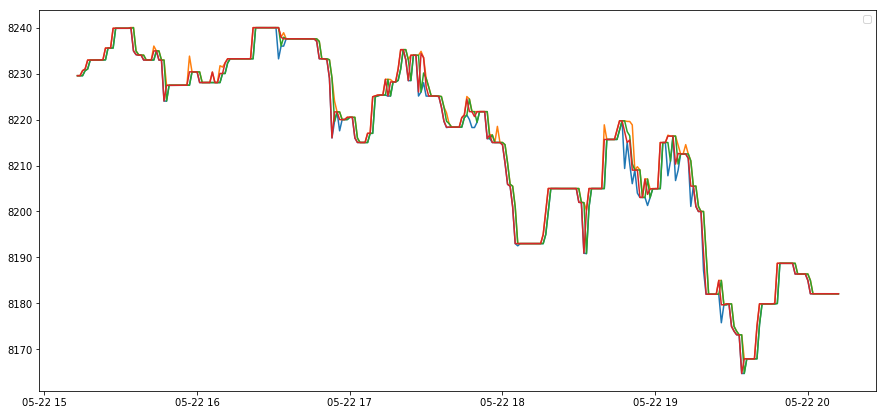

In [12]:
plt.figure(figsize = (15,7))
plt.plot(dd)
plt.legend()
plt.show()

In [13]:
dd.columns

Index(['low', 'high', 'open', 'close'], dtype='object')

In [14]:
data = [
       go.Scatter(
          x = dd.index,
          y = dd.low,
          mode='lines',
          name='low'),
    
        go.Scatter(
          x = dd.index,
          y = dd.high,
          mode='lines',
          name='high'),
    
        go.Scatter(
          x = dd.index,
          y = dd.open,
          mode='lines',
          name='open'),
    
        go.Scatter(
          x = dd.index,
          y = dd.close,
          mode='lines',
          name='close'),
    
    ]
py.iplot(data, filename = 'gasia')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gasia4444/0 or inside your plot.ly account where it is named 'gasia'


# Get a lot of data

In [20]:
from tqdm import tqdm, tqdm_notebook

In [38]:
end = pd.to_datetime('2016-01-01 00:00:00')
for_until = pd.to_datetime('2018-05-010 00:00:00')
all_data =[]
mod = gdax.PublicClient()
# for_until_unix = calendar.timegm(for_until.utctimetuple())
# tq = for_until_unix - calendar.timegm(end.utctimetuple())

ee = (for_until - end) 
# pbar = tqdm_notebook(total = (ee.days*12*60)//3 )
pbar = tqdm_notebook(total = (ee.days*24)//(11) )
while end + timedelta(hours = 12) < for_until:
    pbar.update(1)
    
    start = end 
    end  = start + timedelta(hours = 12)
    mod = gdax.PublicClient()
    data = mod.get_product_historic_rates('BTC-USD', start = start, end = end, granularity='300' )
    all_data.extend(data)
    
    
pbar.close()   

HBox(children=(IntProgress(value=0, max=798), HTML(value='')))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [22]:
qq = [i for i in all_data if len(i) == 6]
df = pd.DataFrame(qq, columns = ['time', 'low', 'high', 'open', 'close', 'volume'])

In [23]:
date_time = []
for i in df.time.values:
    utc_time = datetime.datetime.utcfromtimestamp(i)
#     utc_time.strftime("%Y-%m-%d %H:%M:%S (UTC)")
    date_time.append(utc_time.strftime("%Y-%m-%d %H:%M:%S"))

In [24]:
df['timestamp'] = pd.to_datetime(date_time)
dd = df.set_index('timestamp')

In [27]:
dd= dd.drop_duplicates()
dd.sort_index(inplace=True)

In [28]:
name = 'bitcoin_data_five_minute_2016_2018.csv'
dd.to_csv(name)
df = pd.read_csv(name, parse_dates = ['timestamp']).set_index('timestamp')

### append the new scraped data to the old one

In [29]:
# dd_new = dd.copy()
# merged_data = pd.concat([df, dd_new])
# merged_data.drop_duplicates(inplace=True)
# merged_data = merged_data.sort_index()
# merged_data.to_csv('bitcoin_data.csv')

# Read Data

In [32]:
df_1 = pd.read_csv('bitcoin_data_five_minute_2014_2016.csv', parse_dates = ['timestamp']).set_index('timestamp')
df_2 = pd.read_csv('bitcoin_data_five_minute_2016_2018.csv', parse_dates = ['timestamp']).set_index('timestamp')


In [34]:
frames = [df_1, df_2]

df = pd.concat(frames)

In [35]:
df.sort_index(inplace=True)

In [37]:
dd = df
data = [
       go.Scatter(
          x = dd.index,
          y = dd.low,
          mode='lines',
          name='low'),
    
        go.Scatter(
          x = dd.index,
          y = dd.high,
          mode='lines',
          name='high'),
    
        go.Scatter(
          x = dd.index,
          y = dd.open,
          mode='lines',
          name='open'),
    
        go.Scatter(
          x = dd.index,
          y = dd.close,
          mode='lines',
          name='close'),
    
        go.Scatter(
          x = dd.index,
          y = dd.volume,
          mode='lines',
          name='volume'),
    
    ]
py.iplot(data, filename = 'gasia')

/home/gasia/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gasia4444/0 or inside your plot.ly account where it is named 'gasia'


/home/gasia/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [34]:
dd = dd.drop('time', axis = 1)